In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
sns.set(font_scale=1.5)  #just for size


In [2]:
# df=pd.read_csv("Marketing_Campaign.csv")
# df.head()

In [3]:
# df=pd.read_csv("glass.csv")
# df.head()

In [4]:
col_names=['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv("glass.csv",names=col_names,index_col='id')  #dataframe is glass
glass.sort_values('al',inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


C:\Users\muddi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


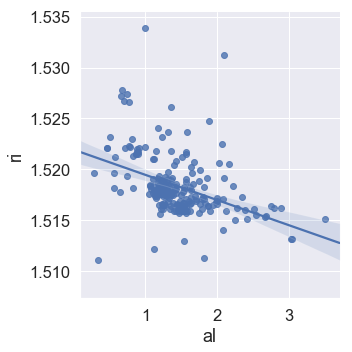

In [10]:
sns.lmplot(x='al',y='ri' ,data=glass)

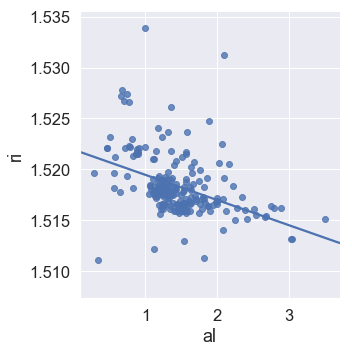

In [5]:
sns.lmplot(x='al',y='ri' ,data=glass, ci = None)  #ci -->confidence interval --> how far the line can go 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


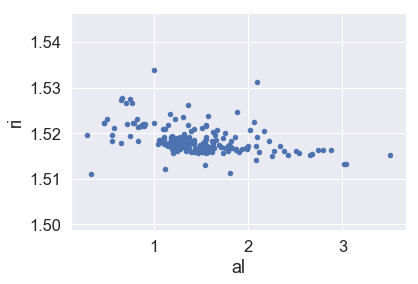

In [14]:
glass.plot(kind='scatter',x='al',y='ri')

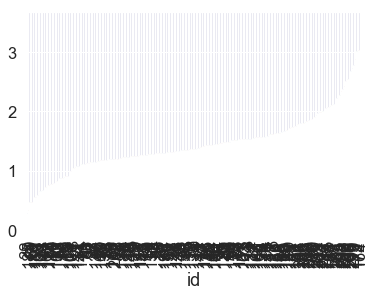

In [7]:
glass['al'].plot(kind='bar') #bar means bar graph if we give hist -->histogram

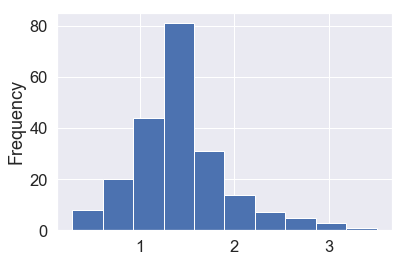

In [11]:
glass['al'].plot(kind='hist')

In [8]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
feature_cols = ['al']
X=glass[feature_cols]
Y=glass.ri
linreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
glass['ri_pred']=linreg.predict(X)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


Text(0, 0.5, 'Predicted ri')

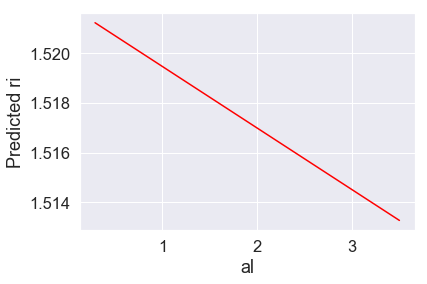

In [15]:
plt.plot(glass.al,glass.ri_pred,color='red')
plt.xlabel('al')
plt.ylabel('Predicted ri')

Text(0, 0.5, 'ri')

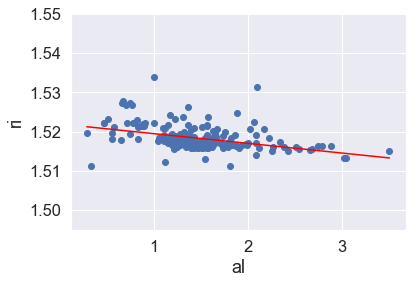

In [17]:
plt.scatter(glass.al,glass.ri)
plt.plot(glass.al,glass.ri_pred,color='red')
plt.xlabel('al')
plt.ylabel('ri')

In [19]:
linreg.intercept_ + linreg.coef_*2   #linreg.coef_-->m(slope) and b=linreg.intercept_

array([1.51699012])

In [23]:
linreg.predict([[2]])

array([1.51699012])

In [24]:
list(zip(feature_cols,linreg.coef_))  #increase al by 1 so al=3 results in decrease of ri 

[('al', -0.0024776063874696235)]

In [25]:
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [26]:

glass['household']=glass.glass_type.map({1:0,2:0,3:0,5:1,6:1,7:1})   #target variable as 0 and 1
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household
id,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0


Text(0, 0.5, 'household')

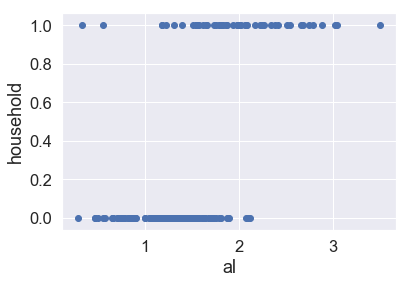

In [27]:
plt.scatter(glass.al,glass.household)
plt.xlabel('al')
plt.ylabel('household')

In [29]:
feature_cols=['al']
X=glass[feature_cols]
Y=glass.household
linreg.fit(X,Y)
glass['household_pred']=linreg.predict(X)   #linear Regression predicted value is saved in household_pred variable

Text(0, 0.5, 'household')

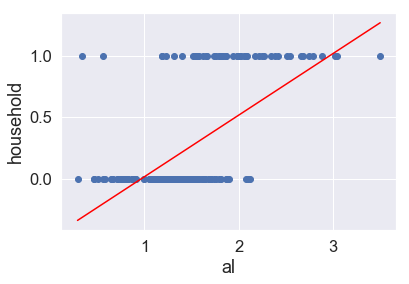

In [31]:
plt.scatter(glass.al,glass.household)
plt.plot(glass.al,glass.household_pred,color='red')
plt.xlabel('al')
plt.ylabel('household')

In [32]:
#understanding np.where

import numpy as np
nums=np.array([5,15,8])
np.where(nums>10,'big','small')

array(['small', 'big', 'small'], dtype='<U5')

In [33]:
glass['household_pred_class']=np.where(glass.household_pred>=0.5,1,0)  #convert household_pred as 0 and 1
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0


Text(0, 0.5, 'household')

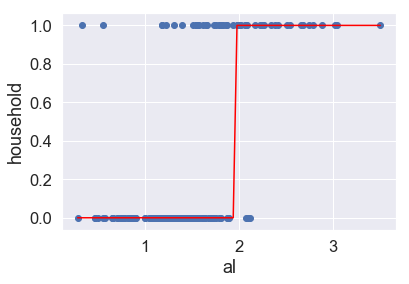

In [34]:
plt.scatter(glass.al,glass.household)
plt.plot(glass.al,glass.household_pred_class,color='red')   #convert continuous to discrete (0 and 1)
plt.xlabel('al')
plt.ylabel('household')

In [36]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
feature_cols = ['al']
X = glass[feature_cols]
Y = glass.household
logreg.fit(X,Y)
glass['household_pred_class'] = logreg.predict(X)

C:\Users\muddi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'household')

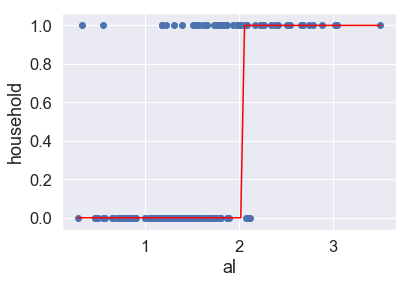

In [37]:
plt.scatter(glass.al,glass.household)
plt.plot(glass.al,glass.household_pred_class,color='red')   
plt.xlabel('al')
plt.ylabel('household')

In [45]:
glass['household_pred_prob'] = logreg.predict_proba(X)[:,1]  # all rows and 1st column

Text(0, 0.5, 'household')

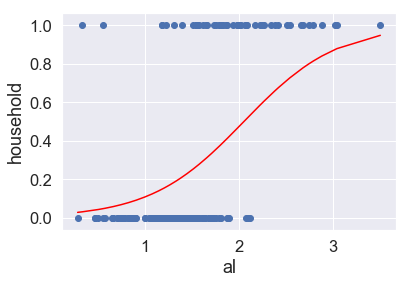

In [46]:
plt.scatter(glass.al,glass.household)
plt.plot(glass.al,glass.household_pred_prob,color='red')   
plt.xlabel('al')
plt.ylabel('household')

In [48]:
print(logreg.predict_proba([[1]]))    #different input say al=1,2,3
print(logreg.predict_proba([[2]]))    #first values will come by 1-second eg:1-0.107=0.8925 
print(logreg.predict_proba([[3]]))

[[0.89253652 0.10746348]]
[[0.52645662 0.47354338]]
[[0.12953623 0.87046377]]
